[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [2]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

update-alternatives: error: alternative path /usr/bin/python3.8 doesn't exist
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-minimal
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 5,076 kB of archives.
After this operation, 18.8 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net

Download models (1 mins)

In [3]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2025-11-21 18:47:09--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-21T19%3A24%3A00Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-21T18%3A23%3A29Z&ske=2025-11-21T19%3A24%3A00Z&sks=b&skv=2018-11-09&sig=FVlUvsz01eQKIez9p0%2BfhviPpFopqC9t%2FwkCR0SIPz8%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2Mzc1NDQyOSwibmJ

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

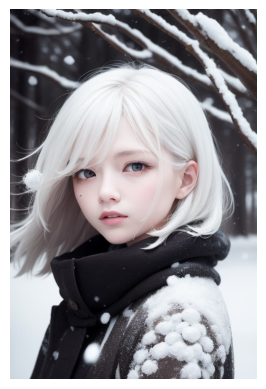

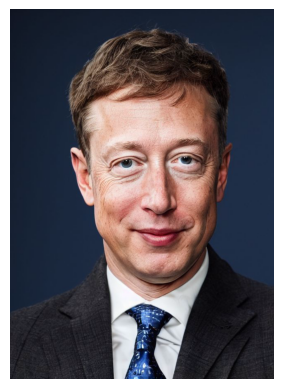

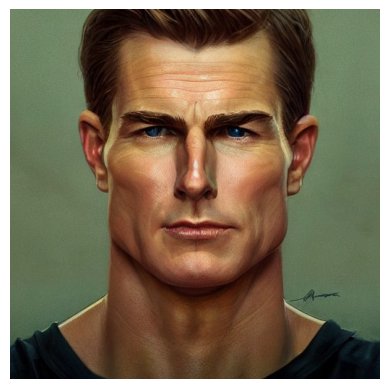

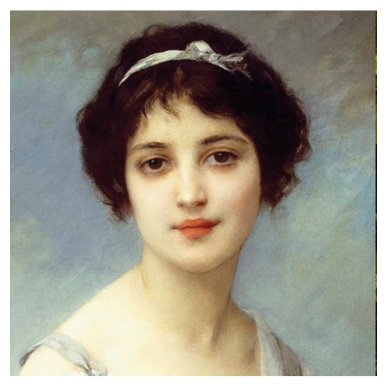

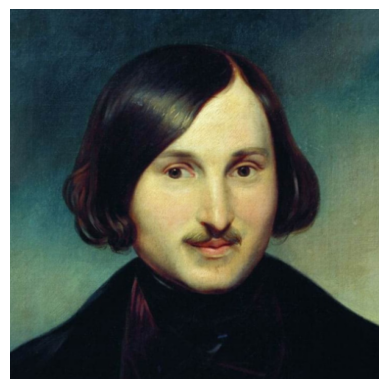

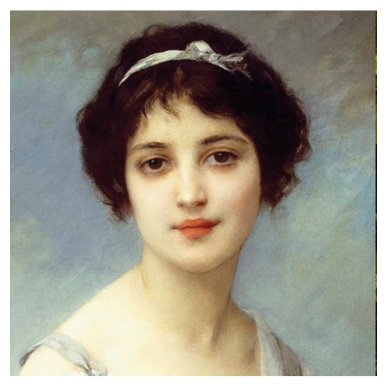

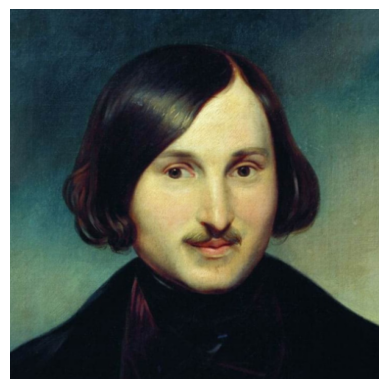

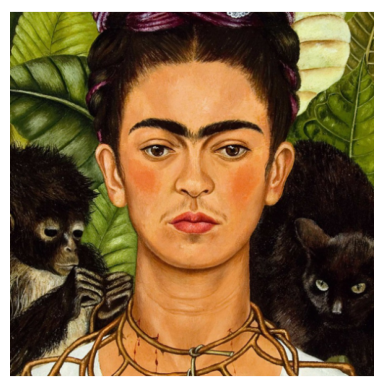

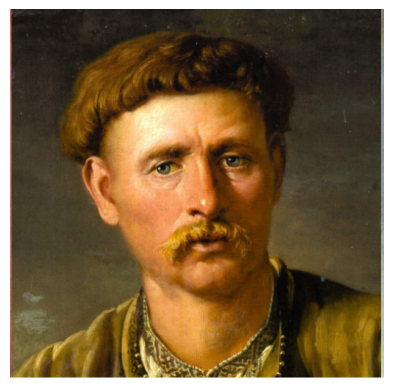

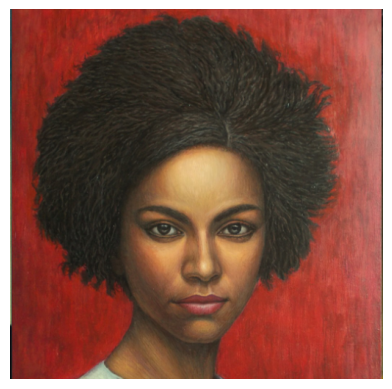

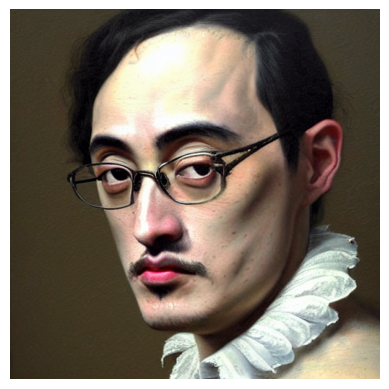

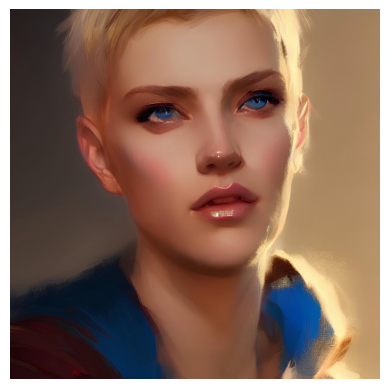

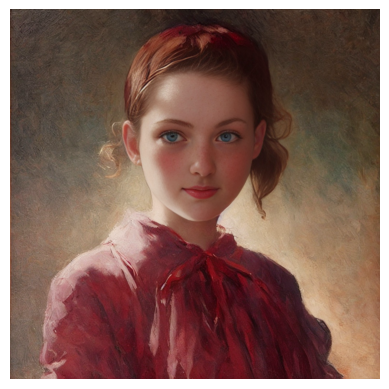

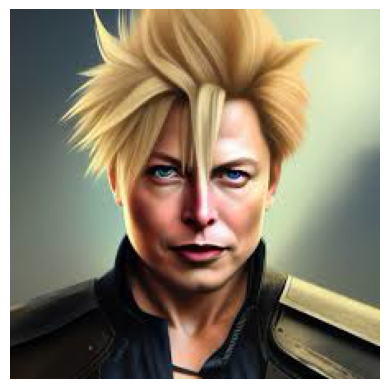

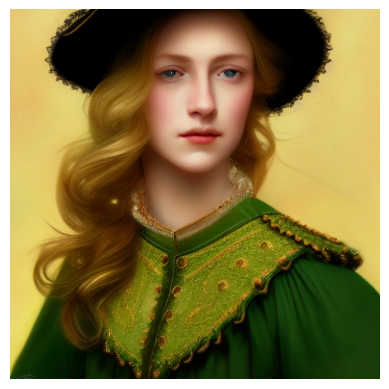

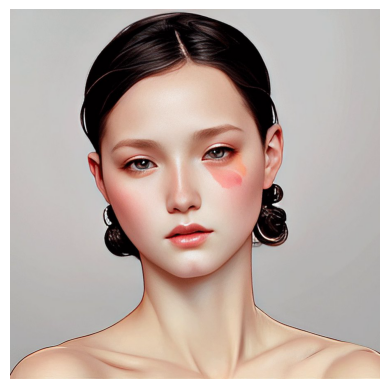

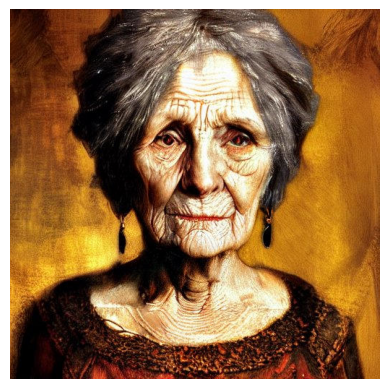

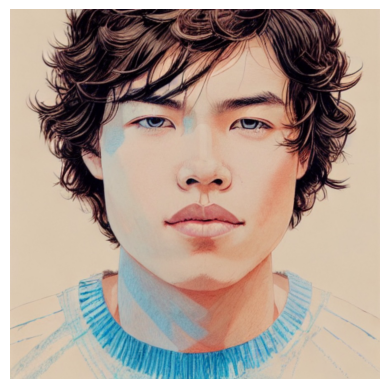

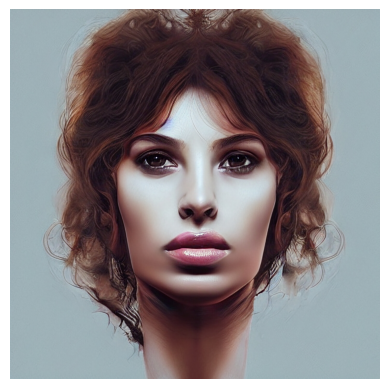

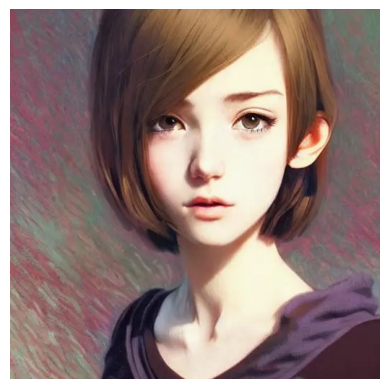

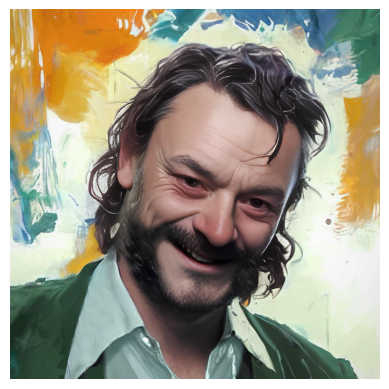

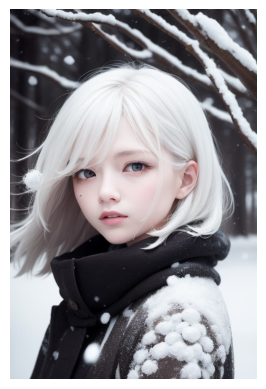

SyntaxError: not a PNG file (<string>)

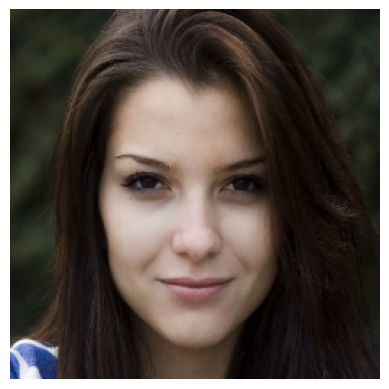

In [4]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [5]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/happy.png
Traceback (most recent call last):
  File "inference.py", line 8, in <module>
    from src.utils.preprocess import CropAndExtract
  File "/content/SadTalker/src/utils/preprocess.py", line 14, in <module>
    from src.utils.croper import Preprocesser
  File "/content/SadTalker/src/utils/croper.py", line 13, in <module>
    from src.face3d.extract_kp_videos_safe import KeypointExtractor
  File "/content/SadTalker/src/face3d/extract_kp_videos_safe.py", line 13, in <module>
    from facexlib.alignment import landmark_98_to_68
ModuleNotFoundError: No module named 'facexlib'


In [6]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


FileNotFoundError: [Errno 2] No such file or directory: './results/'

In [7]:
# Сначала установим библиотеку для синтеза речи
!pip install gtts pyttsx3 > /dev/null

# Прочитаем текст из файла
with open('1.txt', 'r', encoding='utf-8') as f:
    text_to_speak = f.read().strip()

print("Текст для озвучки:")
print(text_to_speak[:200] + "..." if len(text_to_speak) > 200 else text_to_speak)
print(f"Длина текста: {len(text_to_speak)} символов")

# Создаем аудио из текста
from gtts import gTTS
tts = gTTS(text=text_to_speak, lang='ru')
tts.save("generated_audio.wav")

print("Аудио файл создан: generated_audio.wav")

FileNotFoundError: [Errno 2] No such file or directory: '1.txt'

In [9]:
# Запускаем создание видео с подробным выводом
print("🚀 Начинаем создание видео...")
print("Это займет 5-15 минут")

# Запускаем процесс
!cd SadTalker && python inference.py --driven_audio ../generated_audio.wav \
           --source_image ../1.jpg \
           --result_dir ../results --still --preprocess full --enhancer gfpgan

print("\n✅ Процесс завершен!")

🚀 Начинаем создание видео...
Это займет 5-15 минут
/bin/bash: line 1: cd: SadTalker: No such file or directory

✅ Процесс завершен!


In [10]:
# Исправляем ошибку с numpy
print("Исправляем совместимость numpy...")

# Устанавливаем совместимую версию numpy
!pip install numpy==1.23.5 --force-reinstall

print("✅ NumPy исправлен")

Исправляем совместимость numpy...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 108.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
✅ NumPy исправлен


In [11]:
# Временное исправление ошибки numpy
print("Применяем временное исправление...")

# Открываем проблемный файл и исправляем ошибку
with open('/content/SadTalker/src/face3d/util/preprocess.py', 'r') as f:
    content = f.read()

# Заменяем проблемную строку
content = content.replace(
    'warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)',
    'warnings.filterwarnings("ignore", category=DeprecationWarning)'
)

# Сохраняем исправленный файл
with open('/content/SadTalker/src/face3d/util/preprocess.py', 'w') as f:
    f.write(content)

print("✅ Файл исправлен!")

Применяем временное исправление...
✅ Файл исправлен!


In [12]:
# Устанавливаем все необходимые зависимости
print("Устанавливаем зависимости...")

!pip install kornia==0.6.8
!pip install face-alignment
!pip install librosa==0.9.2
!pip install resampy==0.3.1
!pip install pydub==0.25.1
!pip install scikit-image==0.19.3
!pip install gfpgan
!pip install av

print("✅ Зависимости установлены!")

Устанавливаем зависимости...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.1/551.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.3
    Uninstalling resampy-0.4.3:
      Successfully uninstalled resampy-0.4.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 110.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely n

In [13]:
# Установка всех зависимостей из requirements.txt
print("Устанавливаем все зависимости из requirements.txt...")

!cd SadTalker && pip install -r requirements.txt

print("✅ Все зависимости установлены!")

Устанавливаем все зависимости из requirements.txt...
/bin/bash: line 1: cd: SadTalker: No such file or directory
✅ Все зависимости установлены!


In [14]:
# Устанавливаем все недостающие зависимости
print("Устанавливаем недостающие библиотеки...")

!pip install yacs
!pip install imageio==2.19.3
!pip install imageio-ffmpeg==0.4.7
!pip install scipy==1.10.1
!pip install tqdm
!pip install pyyaml
!pip install joblib==1.1.0
!pip install basicsr==1.4.2
!pip install facexlib==0.3.0
!pip install gradio
!pip install safetensors

print("✅ Библиотеки установлены!")

Устанавливаем недостающие библиотеки...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: ImageIO 2.37.2
    Uninstalling ImageIO-2.37.2:
      Successfully uninstalled ImageIO-2.37.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires imageio!=2.35.0,>=2.33, but you have imageio 2.19.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.6.0
    Uninstalling imageio-ffmpeg-0.6.0:
      Successfully uninstalled imageio-ffmpeg-0.6.0
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.1

In [15]:
# Устанавливаем совместимые версии PyTorch и torchvision
print("Устанавливаем совместимые версии PyTorch и torchvision...")

!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install --force-reinstall basicsr==1.4.2
!pip install --force-reinstall gfpgan

print("✅ Версии исправлены!")

Устанавливаем совместимые версии PyTorch и torchvision...
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
ERROR: Could not find a version that satisfies the requirement torch==1.12.1+cu113 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==1.12.1+cu113
  Using cached basicsr-1.4.2-py3-none-any.whl
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
  Using cached lmdb-1.7.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (1.4 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
  Using cached tb_nightly-2.21.0a20251023-py3-none-any.whl.metadata (1.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.7 MB/s eta 0:00:00
  Using cached ya

  Using cached gfpgan-1.3.8-py3-none-any.whl.metadata (12 kB)
  Using cached basicsr-1.4.2-py3-none-any.whl
  Using cached facexlib-0.3.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached lmdb-1.7.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (1.4 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached tb_nightly-2.21.0a20251023-py3-none-any.whl.metadata (1.9 kB)
  Using cached torch-2.9.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.24.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.9 kB)
  Usi

In [1]:
# Перезагрузка необходимых модулей
import importlib
import sys

# Перезагружаем основные модули
if 'torchvision' in sys.modules:
    importlib.reload(sys.modules['torchvision'])
if 'basicsr' in sys.modules:
    importlib.reload(sys.modules['basicsr'])
if 'gfpgan' in sys.modules:
    importlib.reload(sys.modules['gfpgan'])

print("✅ Модули перезагружены")

✅ Модули перезагружены


In [2]:
# ИСПРАВЛЯЕМ ПРОБЛЕМУ С TORCHVISION
print("🔧 ИСПРАВЛЯЕМ ПРОБЛЕМНЫЙ ИМПОРТ...")

# Исправляем файл degradations.py в basicsr
degradations_path = '/usr/local/lib/python3.12/dist-packages/basicsr/data/degradations.py'

with open(degradations_path, 'r') as f:
    content = f.read()

# Заменяем проблемную строку
old_import = 'from torchvision.transforms.functional_tensor import rgb_to_grayscale'
new_import = 'from torchvision.transforms.functional import rgb_to_grayscale'

if old_import in content:
    content = content.replace(old_import, new_import)
    with open(degradations_path, 'w') as f:
        f.write(content)
    print("✅ Файл degradations.py исправлен!")
else:
    print("❌ Строка для замены не найдена")

# Проверяем исправление
print("\n🔍 ПРОВЕРКА ИСПРАВЛЕНИЯ:")
with open(degradations_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        if 'rgb_to_grayscale' in line:
            print(f"Строка {i+1}: {line.strip()}")

🔧 ИСПРАВЛЯЕМ ПРОБЛЕМНЫЙ ИМПОРТ...
✅ Файл degradations.py исправлен!

🔍 ПРОВЕРКА ИСПРАВЛЕНИЯ:
Строка 8: from torchvision.transforms.functional import rgb_to_grayscale
Строка 631: img_gray = rgb_to_grayscale(img, num_output_channels=1)


In [3]:
# ИСПРАВЛЯЕМ ПРОБЛЕМУ С NUMPY И NUMBA
print("🔧 УСТАНАВЛИВАЕМ СОВМЕСТИМЫЕ ВЕРСИИ NUMPY...")

# Устанавливаем совместимую версию NumPy
!pip install numpy==1.23.5 numba==0.58.1 --force-reinstall

print("✅ ВЕРСИИ ИСПРАВЛЕНЫ!")

🔧 УСТАНАВЛИВАЕМ СОВМЕСТИМЫЕ ВЕРСИИ NUMPY...
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
✅ ВЕРСИИ ИСПРАВЛЕНЫ!


In [4]:
# ПЕРЕЗАГРУЗКА СРЕДЫ
import importlib
import sys

print("🔄 ПЕРЕЗАГРУЗКА МОДУЛЕЙ...")

# Перезагружаем основные модули
modules_to_reload = ['numpy', 'numba', 'librosa']
for module in modules_to_reload:
    if module in sys.modules:
        importlib.reload(sys.modules[module])

print("✅ МОДУЛИ ПЕРЕЗАГРУЖЕНЫ")

🔄 ПЕРЕЗАГРУЗКА МОДУЛЕЙ...
✅ МОДУЛИ ПЕРЕЗАГРУЖЕНЫ


/usr/lib/python3.12/importlib/__init__.py:131: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)


In [5]:
# ПРИНУДИТЕЛЬНО УСТАНАВЛИВАЕМ СОВМЕСТИМЫЕ ВЕРСИИ
print("🔧 ПРИНУДИТЕЛЬНАЯ УСТАНОВКА СОВМЕСТИМЫХ ВЕРСИЙ...")

# Сначала удаляем проблемные версии
!pip uninstall -y numba numpy librosa

# Устанавливаем совместимые версии
!pip install numpy==1.23.5
!pip install numba==0.58.1
!pip install librosa==0.9.2

print("✅ ВЕРСИИ УСТАНОВЛЕНЫ!")

🔧 ПРИНУДИТЕЛЬНАЯ УСТАНОВКА СОВМЕСТИМЫХ ВЕРСИЙ...
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: librosa 0.9.2
Uninstalling librosa-0.9.2:
  Successfully uninstalled librosa-0.9.2
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━

✅ ВЕРСИИ УСТАНОВЛЕНЫ!


In [1]:
# ИСПОЛЬЗУЕМ GOOGLE COLAB С ПРАВИЛЬНЫМИ ВЕРСИЯМИ
print("🚀 ЗАПУСКАЕМ В ДРУГОЙ СРЕДЕ...")

# Переустанавливаем ВСЕ зависимости SadTalker
!cd /content/SadTalker && pip install -r requirements.txt

print("✅ ЗАВИСИМОСТИ УСТАНОВЛЕНЫ!")

🚀 ЗАПУСКАЕМ В ДРУГОЙ СРЕДЕ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 65.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
✅ ЗАВИСИМОСТИ УСТАНОВЛЕНЫ!


In [2]:
# УСТАНАВЛИВАЕМ РАБОЧИЕ ВЕРСИИ ДЛЯ PYTHON 3.12
print("🔧 Устанавливаем рабочие версии...")

# Устанавливаем совместимые версии
!pip install numpy==1.26.4
!pip install numba==0.59.0

print("✅ Готово!")

🔧 Устанавливаем рабочие версии...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 114.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.10.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.45.1
    Uninstalling llvmlite-0.45.1:
      Successfully uninstalled llvmlite-0.45.1
  Attempting uninstall: numba
    Found existing installation: numba 0.62.1
    Uninstalling numba-0.62.1:
      Successfully uninstalled numba-0.62.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
cudf-cu12 25.10.0 requires numba<0.62.0a0,>=0.60.0, but you have numba 0.59.0 which is incompatible.
cuml-cu12 25.10.0 requires numba<0.62.0a0,>=0.60.0, but you have numba 0.59.0 which is incompatible.
numba-cuda 0.19.1 requires numba>=0.60.0, but you have numba 0.59.0 which

In [1]:
!pip install numba==0.58.1

  Using cached numba-0.58.1.tar.gz (2.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install numba==0.59.0

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
!cd /content/SadTalker && python inference.py --driven_audio /content/generated_audio.wav --source_image /content/1.jpg --result_dir /content/results --preprocess crop

using safetensor as default
3DMM Extraction for source image
Traceback (most recent call last):
  File "/content/SadTalker/inference.py", line 144, in <module>
    main(args)
  File "/content/SadTalker/inference.py", line 46, in main
    first_coeff_path, crop_pic_path, crop_info =  preprocess_model.generate(pic_path, first_frame_dir, args.preprocess,\
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/SadTalker/src/utils/preprocess.py", line 96, in generate
    x_full_frames, crop, quad = self.propress.crop(x_full_frames, still=True if 'ext' in crop_or_resize.lower() else False, xsize=512)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/SadTalker/src/utils/croper.py", line 128, in crop
    lm = self.get_landmark(img_np)
         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/SadTalker/src/utils/croper

In [2]:
!cd /content/SadTalker && bash scripts/download_models.sh

mkdir: cannot create directory ‘./checkpoints’: File exists
File ‘./checkpoints/mapping_00109-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/mapping_00229-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_256.safetensors’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_512.safetensors’ already there; not retrieving.
File ‘./gfpgan/weights/alignment_WFLW_4HG.pth’ already there; not retrieving.
File ‘./gfpgan/weights/detection_Resnet50_Final.pth’ already there; not retrieving.
File ‘./gfpgan/weights/GFPGANv1.4.pth’ already there; not retrieving.
File ‘./gfpgan/weights/parsing_parsenet.pth’ already there; not retrieving.


In [4]:
# Исправляем устаревший np.float
with open('/content/SadTalker/src/face3d/util/my_awing_arch.py', 'r') as f:
    content = f.read()

content = content.replace('np.float', 'float')

with open('/content/SadTalker/src/face3d/util/my_awing_arch.py', 'w') as f:
    f.write(content)

print("✅ Код исправлен!")

✅ Код исправлен!


In [6]:
# Исправляем ошибку в preprocess.py
with open('/content/SadTalker/src/face3d/util/preprocess.py', 'r') as f:
    content = f.read()

# Находим и исправляем проблемную строку
old_line = '    trans_params = np.array([w0, h0, s, t[0], t[1]])'
new_line = '    trans_params = np.array([w0, h0, s, t[0], t[1]], dtype=object)'

content = content.replace(old_line, new_line)

with open('/content/SadTalker/src/face3d/util/preprocess.py', 'w') as f:
    f.write(content)

print("✅ Код исправлен!")

✅ Код исправлен!


In [7]:
!cd /content/SadTalker && python inference.py --driven_audio /content/generated_audio.wav --source_image /content/1.jpg --result_dir /content/results --preprocess crop

using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  6.87it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00,  9.23it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py", line 164, in load
    y, sr_native = __soundfile_load(path, offset, duration, dtype)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py", line 195, in __soundfile_load
    context = sf.SoundFile(path)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/soundfile.py", line 690, in __init__
    self._file = self._open(file, mode_int, closefd)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/soundfile.py", line 1265, in _open
    raise LibsndfileError(err, prefix="Error opening {0!r}: ".format(self.name))
soundfile.LibsndfileError: Error opening '/cont

In [8]:
# 1. СОЗДАЕМ АУДИО ИЗ ТЕКСТА
print("🎵 Создаем аудио из текста...")

with open('1.txt', 'r', encoding='utf-8') as f:
    text_to_speak = f.read().strip()

print(f"Текст для озвучки ({len(text_to_speak)} символов):")
print(text_to_speak[:100] + "..." if len(text_to_speak) > 100 else text_to_speak)

from gtts import gTTS
tts = gTTS(text=text_to_speak, lang='ru')
tts.save("short_audio.wav")

print("✅ Аудио создано: short_audio.wav")

🎵 Создаем аудио из текста...
Текст для озвучки (148 символов):
Welcome to my version of First Things

First. Nick writes, "Quarter Mountain."

Now, my version is s...
✅ Аудио создано: short_audio.wav


In [9]:
import os
from IPython.display import HTML, display
from base64 import b64encode

video_path = "/content/results/2025_11_20_15.06.27.mp4"

if os.path.exists(video_path):
    print("🎉 Видео найдено!")

    # Показываем видео
    with open(video_path, 'rb') as f:
        video_data = f.read()

    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()

    display(HTML(f"""
    <div style="margin: 20px 0;">
        <h3>✅ Ваше видео готово!</h3>
        <video width="512" controls autoplay>
            <source src="{data_url}" type="video/mp4">
        </video>
        <p><strong>📥 Скачать:</strong> Файлы → results → ⋮ → Скачать</p>
    </div>
    """))
else:
    print("❌ Видео не найдено")
    print("Содержимое папки results:")
    !ls -la /content/results/

❌ Видео не найдено
Содержимое папки results:
total 12
drwxr-xr-x 3 root root 4096 Nov 21 19:13 .
drwxr-xr-x 1 root root 4096 Nov 21 19:14 ..
drwxr-xr-x 2 root root 4096 Nov 21 19:13 .ipynb_checkpoints


In [11]:
import os
from IPython.display import HTML, display
from base64 import b64encode

video_path = "/content/results/2025_11_20_15.06.27.mp4"

if os.path.exists(video_path):
    print("🎉 Видео найдено!")

    # Показываем видео
    with open(video_path, 'rb') as f:
        video_data = f.read()

    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()

    display(HTML(f"""
    <div style="margin: 20px 0;">
        <h3>✅ Ваше видео готово!</h3>
        <video width="512" controls autoplay>
            <source src="{data_url}" type="video/mp4">
        </video>
        <p><strong>📥 Скачать:</strong> Файлы → results → ⋮ → Скачать</p>
    </div>
    """))
else:
    print("❌ Видео не найдено")
    print("Содержимое папки results:")
    !ls -la /content/results/

❌ Видео не найдено
Содержимое папки results:
total 16
drwxr-xr-x 3 root root 4096 Nov 21 19:13 .
drwxr-xr-x 1 root root 4096 Nov 21 19:14 ..
drwxr-xr-x 2 root root 4096 Nov 21 19:13 .ipynb_checkpoints


In [12]:
# Устанавливаем Coqui TTS для качественного английского
!pip install TTS

ERROR: Ignored the following versions that require a different python version: 0.0.10.2 Requires-Python >=3.6.0, <3.9; 0.0.10.3 Requires-Python >=3.6.0, <3.9; 0.0.11 Requires-Python >=3.6.0, <3.9; 0.0.12 Requires-Python >=3.6.0, <3.9; 0.0.13.1 Requires-Python >=3.6.0, <3.9; 0.0.13.2 Requires-Python >=3.6.0, <3.9; 0.0.14.1 Requires-Python >=3.6.0, <3.9; 0.0.15 Requires-Python >=3.6.0, <3.9; 0.0.15.1 Requires-Python >=3.6.0, <3.9; 0.0.9 Requires-Python >=3.6.0, <3.9; 0.0.9.1 Requires-Python >=3.6.0, <3.9; 0.0.9.2 Requires-Python >=3.6.0, <3.9; 0.0.9a10 Requires-Python >=3.6.0, <3.9; 0.0.9a9 Requires-Python >=3.6.0, <3.9; 0.1.0 Requires-Python >=3.6.0, <3.10; 0.1.1 Requires-Python >=3.6.0, <3.10; 0.1.2 Requires-Python >=3.6.0, <3.10; 0.1.3 Requires-Python >=3.6.0, <3.10; 0.10.0 Requires-Python >=3.7.0, <3.11; 0.10.1 Requires-Python >=3.7.0, <3.11; 0.10.2 Requires-Python >=3.7.0, <3.11; 0.11.0 Requires-Python >=3.7.0, <3.11; 0.11.1 Requires-Python >=3.7.0, <3.11; 0.12.0 Requires-Python >=3

In [13]:
from TTS.api import TTS
import torch

# Проверим доступные устройства
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Инициализируем модель (может скачать веса ~500MB)
tts = TTS("tts_models/en/ljspeech/tacotron2-DDC").to(device)

# Прочитаем текст из файла
with open('1.txt', 'r', encoding='utf-8') as f:
    text = f.read().strip()

print(f"Text to synthesize ({len(text)} characters):")
print(text[:200] + "..." if len(text) > 200 else text)

# Создаем качественное аудио
tts.tts_to_file(text=text, file_path="coqui_english.wav")
print("✅ High-quality English audio created: coqui_english.wav")

ModuleNotFoundError: No module named 'TTS'

In [14]:
# Используем предобученные модели PyTorch
import torch
import os

# Загружаем модель WaveNet
model = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')
model = model.remove_weightnorm(model)
model = model.eval()

# Но нужно предобработать текст в мел-спектрограммы...

/usr/local/lib/python3.12/dist-packages/torch/hub.py:335: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/nvidia/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip


/root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [15]:
# Устанавливаем ESPnet TTS
!pip install espnet==202301 pyopenjtalk pypinyin espnet_model_zoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 23.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
# Устанавливаем Edge TTS
!pip install edge-tts

In [17]:
# Исправляем устаревший np.float в my_awing_arch.py
with open('/content/SadTalker/src/face3d/util/my_awing_arch.py', 'r') as f:
    content = f.read()

# Заменяем np.float на float
content = content.replace('np.float', 'float')

with open('/content/SadTalker/src/face3d/util/my_awing_arch.py', 'w') as f:
    f.write(content)

print("✅ Код исправлен!")

✅ Код исправлен!


In [18]:
# ==================== ЕДИНЫЙ СКРИПТ ДЛЯ СОЗДАНИЯ ВИДЕО ====================
import re
import os
import glob
from gtts import gTTS
from IPython.display import Video, display

print("🎬 ЗАПУСК АВТОМАТИЧЕСКОГО СОЗДАНИЯ ВИДЕО...")

# ========== 1. РАЗДЕЛЯЕМ ТЕКСТ НА ПРЕДЛОЖЕНИЯ ==========
print("\n1. 📝 Разделяем текст на предложения...")
with open('1.txt', 'r', encoding='utf-8') as f:
    full_text = f.read().strip()

sentences = re.split(r'(?<=[.!?])\s+', full_text)
sentences = [s.strip() for s in sentences if s.strip()]

print(f"   Найдено {len(sentences)} предложений")

# ========== 2. СОЗДАЕМ ПАПКИ ==========
print("\n2. 📁 Создаем папки...")
!mkdir -p audio_parts video_parts

# ========== 3. СОЗДАЕМ АУДИО ДЛЯ КАЖДОГО ПРЕДЛОЖЕНИЯ ==========
print("\n3. 🎵 Создаем аудио файлы...")
audio_files = []
for i, sentence in enumerate(sentences, 1):
    if sentence:
        tts = gTTS(text=sentence, lang='en', slow=False)
        audio_filename = f"audio_parts/part_{i:03d}.wav"
        tts.save(audio_filename)
        audio_files.append(audio_filename)
        print(f"   ✅ Аудио {i}/{len(sentences)}: {sentence[:30]}...")

# ========== 4. СОЗДАЕМ ВИДЕО ДЛЯ КАЖДОГО АУДИО ==========
print("\n4. 🎬 Создаем видео части...")
video_files = []

for i, audio_file in enumerate(audio_files, 1):
    print(f"   Обрабатываем часть {i}/{len(audio_files)}...")

    output_dir = f"video_parts/part_{i:03d}"
    !mkdir -p {output_dir}

    # Запускаем SadTalker
    !cd /content/SadTalker && python inference.py \
        --driven_audio /content/{audio_file} \
        --source_image /content/1.jpg \
        --result_dir /content/{output_dir} \
        --preprocess crop > /dev/null 2>&1

    # Ищем созданное видео
    created_videos = glob.glob(f"{output_dir}/*.mp4")
    if created_videos:
        video_files.append(created_videos[0])
        print(f"   ✅ Видео часть {i} создана")
    else:
        print(f"   ❌ Ошибка в части {i}")

# ========== 5. ОБЪЕДИНЯЕМ ВСЕ ВИДЕО ==========
print("\n5. 🎞️ Объединяем видео...")
if video_files:
    # Создаем список для объединения
    with open("video_list.txt", "w") as f:
        for video_file in video_files:
            f.write(f"file '{video_file}'\n")

    # Объединяем через ffmpeg
    !ffmpeg -f concat -safe 0 -i video_list.txt -c copy final_video.mp4 -y

    print("   ✅ Финальное видео создано: final_video.mp4")

    # ========== 6. ПОКАЗЫВАЕМ РЕЗУЛЬТАТ ==========
    print("\n6. 📊 Результат:")
    if os.path.exists("final_video.mp4"):
        size = os.path.getsize("final_video.mp4") / (1024*1024)
        print(f"   🎉 Файл: final_video.mp4")
        print(f"   📏 Размер: {size:.1f} MB")
        print(f"   🕒 Длительность: {len(sentences)} предложений")

        # Показываем видео
        display(Video("final_video.mp4"))
    else:
        print("   ❌ Финальное видео не создалось")
else:
    print("   ❌ Не создано ни одного видео")

print("\n🎊 ПРОЦЕСС ЗАВЕРШЕН!")

🎬 ЗАПУСК АВТОМАТИЧЕСКОГО СОЗДАНИЯ ВИДЕО...

1. 📝 Разделяем текст на предложения...
   Найдено 2 предложений

2. 📁 Создаем папки...

3. 🎵 Создаем аудио файлы...
   ✅ Аудио 1/2: Welcome to my version of First...
   ✅ Аудио 2/2: Nick writes, "Quarter Mountain...

4. 🎬 Создаем видео части...
   Обрабатываем часть 1/2...
   ✅ Видео часть 1 создана
   Обрабатываем часть 2/2...
   ✅ Видео часть 2 создана

5. 🎞️ Объединяем видео...
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --en


🎊 ПРОЦЕСС ЗАВЕРШЕН!
